# Applied Machine Learning: Assignment \#10

### Sheetal Parikh
EN.605.631.81<br>
April 12, 2021
***
***

*In this assignment, we will develop a ML model for cybersecurity intrusion detection. Please
visit the website: https://www.unb.ca/cic/datasets/ids-2017.html and look around to see the problem
space and the evaluation datasets to be used for ML model development.*

*This dataset is collected by cyber experts during experimentation that was carried on for 5 days long. The description of the experiments also inform the experimental ground truth. (Optional: GeneratedLabelledFlows.zip, note that it is already pre-processed by someone)*


## Problem 1

*Download the labeled dataset, if you like use a dummy email address for registration. There must be 8 data files, each representing a particular cyber-attack type and it's day, and it's collected pcap data*

In [1]:
# imports for notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
import os 

#checking current directory
#print(os.getcwd() + "\n")

# change the current directory 
# to specified directory 
os.chdir(r"C:\Users\Sheetal\Documents\Sheetal\datasets") 

#Read in file
relative_path1 = 'TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
relative_path2 = 'TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
relative_path3 = 'TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv'
relative_path4 = 'TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv'
relative_path5 = 'TrafficLabelling/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'
relative_path6 = 'TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'
relative_path7 = 'TrafficLabelling/Tuesday-WorkingHours.pcap_ISCX.csv'
relative_path8 = 'TrafficLabelling/Wednesday-workingHours.pcap_ISCX.csv'

df1 = pd.read_csv(relative_path1)
df2 = pd.read_csv(relative_path2)
df3 = pd.read_csv(relative_path3)
df4 = pd.read_csv(relative_path4)
df5 = pd.read_csv(relative_path5)
df6 = pd.read_csv(relative_path6, engine ='python')
df7 = pd.read_csv(relative_path7)
df8 = pd.read_csv(relative_path8)

# Sanity check
print(f'Friday Afternoon DDos: N rows={len(df1)}, M columns={len(df1.columns)}')
print(f'Friday Afternoon Port Scan: N rows={len(df2)}, M columns={len(df2.columns)}')
print(f'Friday Morning: N rows={len(df3)}, M columns={len(df3.columns)}')
print(f'Monday Working Hours: N rows={len(df4)}, M columns={len(df4.columns)}')
print(f'Thursday Afternoon Infilteration: N rows={len(df5)}, M columns={len(df5.columns)}')
print(f'Thursday Morning WebAttacks: N rows={len(df6)}, M columns={len(df6.columns)}')
print(f'Tuesday Working Hours: N rows={len(df7)}, M columns={len(df7.columns)}')
print(f'Wednesday Working Hours: N rows={len(df8)}, M columns={len(df8.columns)}')

#print first few rows to visualize dataset
##df_org.head()

Friday Afternoon DDos: N rows=225745, M columns=85
Friday Afternoon Port Scan: N rows=286467, M columns=85
Friday Morning: N rows=191033, M columns=85
Monday Working Hours: N rows=529918, M columns=85
Thursday Afternoon Infilteration: N rows=288602, M columns=85
Thursday Morning WebAttacks: N rows=458968, M columns=85
Tuesday Working Hours: N rows=445909, M columns=85
Wednesday Working Hours: N rows=692703, M columns=85


In [2]:
df1.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
df2.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,1266342,41,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.16-192.168.10.50-60058-22-6,192.168.10.16,60058,192.168.10.50,22,6,7/7/2017 1:00,1319353,41,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,160,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.12-192.168.10.50-35398-22-6,192.168.10.12,35398,192.168.10.50,22,6,7/7/2017 1:00,1303488,41,42,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.50,22,192.168.10.12,35396,6,7/7/2017 1:00,77,1,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [4]:
df3.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.50-3268-56108-6,192.168.10.50,56108,192.168.10.3,3268,6,7/7/2017 8:59,112740690,32,16,...,32,3.594286e+02,1.199802e+01,380.0,343.0,16100000.0,4.988048e+05,16400000.0,15400000.0,BENIGN
1,192.168.10.3-192.168.10.50-389-42144-6,192.168.10.50,42144,192.168.10.3,389,6,7/7/2017 8:59,112740560,32,16,...,32,3.202857e+02,1.574499e+01,330.0,285.0,16100000.0,4.987937e+05,16400000.0,15400000.0,BENIGN
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/7/2017 9:00,113757377,545,0,...,0,9.361829e+06,7.324646e+06,18900000.0,19.0,12200000.0,6.935824e+06,20800000.0,5504997.0,BENIGN
3,192.168.10.9-224.0.0.252-63210-5355-17,192.168.10.9,63210,224.0.0.252,5355,17,7/7/2017 9:00,100126,22,0,...,32,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,192.168.10.9-224.0.0.22-0-0-0,192.168.10.9,0,224.0.0.22,0,0,7/7/2017 9:00,54760,4,0,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [5]:
df4.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80,192.168.10.5,49188,6,03/07/2017 08:55:58,4,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80,192.168.10.5,49188,6,03/07/2017 08:55:58,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80,192.168.10.5,49188,6,03/07/2017 08:55:58,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80,192.168.10.5,49188,6,03/07/2017 08:55:58,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.14-8.253.185.121-49486-80-6,8.253.185.121,80,192.168.10.14,49486,6,03/07/2017 08:56:22,3,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [6]:
df5.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-60148-22-6,192.168.10.12,60148,192.168.10.50,22,6,6/7/2017 1:00,166,1,1,...,32,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
1,192.168.10.12-192.168.10.50-60148-22-6,192.168.10.50,22,192.168.10.12,60148,6,6/7/2017 1:00,83,1,2,...,32,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
2,192.168.10.12-91.189.89.199-123-123-17,192.168.10.12,123,91.189.89.199,123,17,6/7/2017 1:00,99947,1,1,...,40,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
3,192.168.10.12-72.38.129.202-123-123-17,192.168.10.12,123,72.38.129.202,123,17,6/7/2017 1:00,37017,1,1,...,32,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
4,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,6/7/2017 1:00,111161336,147,0,...,0,1753752.625,2123197.578,4822992.0,95.0,9463032.7,2657727.996,13600000.0,5700287.0,BENIGN


In [7]:
df6.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.50-389-33898-6,192.168.10.50,33898.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113095465.0,48.0,24.0,...,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,BENIGN
1,192.168.10.3-192.168.10.50-389-33904-6,192.168.10.50,33904.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113473706.0,68.0,40.0,...,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,BENIGN
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0.0,8.0.6.4,0.0,0.0,6/7/2017 8:59,119945515.0,150.0,0.0,...,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,BENIGN
3,192.168.10.14-65.55.44.109-59135-443-6,192.168.10.14,59135.0,65.55.44.109,443.0,6.0,6/7/2017 8:59,60261928.0,9.0,7.0,...,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.14-53-59555-17,192.168.10.14,59555.0,192.168.10.3,53.0,17.0,6/7/2017 8:59,269.0,2.0,2.0,...,32.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [8]:
df7.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.5-88-49182-6,192.168.10.5,49182,192.168.10.3,88,6,4/7/2017 8:54,640,7,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.3-192.168.10.5-88-49183-6,192.168.10.5,49183,192.168.10.3,88,6,4/7/2017 8:54,900,9,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.3-192.168.10.5-88-49184-6,192.168.10.5,49184,192.168.10.3,88,6,4/7/2017 8:54,1205,7,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.3-192.168.10.5-88-49185-6,192.168.10.5,49185,192.168.10.3,88,6,4/7/2017 8:54,511,7,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.5-88-49186-6,192.168.10.5,49186,192.168.10.3,88,6,4/7/2017 8:54,773,9,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [9]:
df8.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,49459,209.48.71.168,80,6,5/7/2017 8:42,38308,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,49453,192.168.10.3,389,6,5/7/2017 8:42,479,11,5,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.17,46124,192.168.10.3,88,6,5/7/2017 8:42,1095,10,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.17,49454,192.168.10.3,389,6,5/7/2017 8:42,15206,17,12,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.17,46126,192.168.10.3,88,6,5/7/2017 8:42,1092,9,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [10]:
df1.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

The pcap datasets from the GeneratedLabelledFlows.zip file was imported into the notebook.  After taking a quick view of each dataset, I think variables such as Flow ID, Source IP, Destination IP, and Timestamp can be dropped (will be dropped in problem 2).  The columns have weird spacing which will have to be dealth with later on.  We should take a further look at whether the datasets are balanced.

***

## Problem 2

*Pick one of the data files, call it Dataset 1, and examine its features. Make sure it has more than one class value for its label.*

In [11]:
#checking which datasets are balanced

def printlabels(_df):
    summary = _df[' Label'].value_counts()
    
    print(summary)
    print("")

In [12]:
#checking which datasets are balanced
X=list()
list_df = [df1,df2,df3,df4,df5,df6,df7,df8]
for df in list_df:
    X.append(printlabels(df))

DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64

PortScan    158930
BENIGN      127537
Name:  Label, dtype: int64

BENIGN    189067
Bot         1966
Name:  Label, dtype: int64

BENIGN    529918
Name:  Label, dtype: int64

BENIGN          288566
Infiltration        36
Name:  Label, dtype: int64

BENIGN                        168186
Web Attack – Brute Force        1507
Web Attack – XSS                 652
Web Attack – Sql Injection        21
Name:  Label, dtype: int64

BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name:  Label, dtype: int64

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name:  Label, dtype: int64



Datasets 1 and 2 look fairly balanced. The second dataset appears to be the most balance with both BENIGN and PortScan threat as the labels.  We will use the Friday Afternoon Port Scan dataset or dataset2 for the next few problems

In [13]:
#renaming dataframe to Dataset 1
Dataset1 = df2.copy() 

In [14]:
Dataset1.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,286467.000000,286467.000000,286467.000000,2.864670e+05,286467.000000,286467.000000,286467.000000,2.864670e+05,286467.000000,286467.000000,...,286467.000000,286467.000000,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05
mean,43932.432563,8044.876324,8.306000,5.379331e+06,3.473283,3.520500,233.407667,2.707247e+03,81.033369,10.352013,...,1.728618,29.075328,3.409213e+04,2.294987e+04,7.785722e+04,2.171380e+04,1.602973e+06,6.120390e+04,1.647188e+06,1.536286e+06
std,17713.904328,15378.583442,4.481562,2.192364e+07,19.515131,28.288916,1865.523600,5.097783e+04,327.768035,24.237795,...,14.897361,8.014607,4.659319e+05,2.623049e+05,7.342606e+05,4.223145e+05,8.682334e+06,1.217016e+06,8.882728e+06,8.561545e+06
min,0.000000,0.000000,0.000000,-1.300000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,37516.000000,80.000000,6.000000,4.400000e+01,1.000000,1.000000,0.000000,6.000000e+00,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,49008.000000,1110.000000,6.000000,6.500000e+01,1.000000,1.000000,2.000000,6.000000e+00,2.000000,2.000000,...,0.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,56576.000000,6881.000000,6.000000,2.380600e+04,2.000000,2.000000,62.000000,1.150000e+02,37.000000,6.000000,...,1.000000,40.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65535.000000,65389.000000,17.000000,1.199999e+08,3119.000000,3635.000000,232349.000000,7.150819e+06,13929.000000,1472.000000,...,2056.000000,60.000000,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.050000e+07,1.200000e+08,1.200000e+08


In [15]:
Dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286467 entries, 0 to 286466
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       286467 non-null  object 
 1    Source IP                    286467 non-null  object 
 2    Source Port                  286467 non-null  int64  
 3    Destination IP               286467 non-null  object 
 4    Destination Port             286467 non-null  int64  
 5    Protocol                     286467 non-null  int64  
 6    Timestamp                    286467 non-null  object 
 7    Flow Duration                286467 non-null  int64  
 8    Total Fwd Packets            286467 non-null  int64  
 9    Total Backward Packets       286467 non-null  int64  
 10  Total Length of Fwd Packets   286467 non-null  int64  
 11   Total Length of Bwd Packets  286467 non-null  int64  
 12   Fwd Packet Length Max        286467 non-nul

In [16]:
print(Dataset1.dtypes.value_counts())

int64      44
float64    36
object      5
dtype: int64


There are 4 features, other than Label, that are objects.  We will drop those columns below.

In [17]:
#dropping colummns that are objects (other than the Label column)

drop = ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp']

Dataset1.drop(columns=drop, inplace=True)

In [18]:
#renaming important columns 

Dataset1.rename(columns = {' Destination Port':'DestinationPort'}, inplace = True) 
Dataset1.rename(columns = {' Source Port':'SourcePort'}, inplace = True) 
Dataset1.rename(columns = {' Label':'Label'}, inplace = True) 

In [19]:
#chekcing if dataset has any nulls
def checknulls(_df):
    nan_cols = [i for i in _df.columns if _df[i].isnull().any()]
    nan_cols_num = _df.isna().sum().sum()
    infinity = len(_df[_df.isin([np.inf, -np.inf]).any(1)])
        
    print(f'The dataset has {nan_cols_num} NaN values under the {nan_cols} column and also has {infinity} rows ' 
          f'with infinity values')
    
checknulls(Dataset1)

The dataset has 15 NaN values under the ['Flow Bytes/s'] column and also has 371 rows with infinity values


In [20]:
#function to remove nulls and those that have values of Infinity

def removeNullInfinity(_df):
    _df.replace([float('inf'), float('-inf')], np.nan, inplace=True)
    _df.replace([np.inf, -np.inf], np.nan, inplace=True)
    nulls = _df.loc[_df.isnull().any(axis=1)].index
    _df.drop(index=nulls, axis=1, inplace=True)
    
    _df = _df.reset_index()
    
    return _df

In [21]:
#removing nulls and making sure that they have been removed
removeNullInfinity(Dataset1)
checknulls(Dataset1)

The dataset has 0 NaN values under the [] column and also has 0 rows with infinity values


In [22]:
Dataset1.shape

(286096, 81)

There were 371 rows that were removed that contained rows with Infinity and null values. The dataset is now ready to be processed further. 

***

## Problem 3

*For the Dataset 1, pick a machine learning methodology and justify your choice.*

I want to approach Dataset1 as classification, a supervised learning problem, since the dataset is balanced and we already have all the labels for the type of attack.  We can categorize the data as either being normal/benign activity or harmful activity (all the other attacks) and aso determine with features would be the most predictive for classifying the type of attack.

***

## Problem 4

*Process the class feature/category as binary classes for supervised learning, assign BENIGN to value 0 and the rest to value 1. Check its balance for the Dataset 1.*

In [23]:
#assigning the Benign label as 0 and all other labels as 1 (malicious activity)

def fixlabel(_df):
    _df['Label'] = pd.Series(np.where(_df.Label.values == 'BENIGN', 0, 1),_df.index)

In [24]:
fixlabel(Dataset1)

In [25]:
Dataset1.head()

,SourcePort,DestinationPort,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,35396,22,6,1266342,41,44,2664,6954,456,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,60058,22,6,1319353,41,44,2664,6954,456,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,35396,22,6,160,1,1,0,0,0,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,35398,22,6,1303488,41,42,2728,6634,456,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,22,35396,6,77,1,2,0,0,0,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
Dataset1['Label'].value_counts()

1    158804
0    127292
Name: Label, dtype: int64

Now the label column only has values of 0 and 1.  The source port and destination port columns can be processed further for one-hot-encoding.

***

## Problem 5

*Explore Dataset 1 features with respect to the class. (Hint: features Source Port and Destination Port are very useful, research and find out important networking port numbers and one-hot-encode them. Unimportant port numbers or source port numbers can be assigned to a feature called 'other ports').*

In [27]:
#taking a quick view of the listed ports in the datset

Dataset1['SourcePort'].value_counts()

443      13729
80        5198
60768     1009
59328     1008
55826     1004
         ...  
62905        1
2159         1
33115        1
13099        1
45373        1
Name: SourcePort, Length: 36914, dtype: int64

In [28]:
#taking a quick view of the listed ports in the datset

Dataset1['DestinationPort'].value_counts()

53       58744
443      26923
80       16734
22         914
8080       778
         ...  
54653        1
52606        1
7780         1
48752        1
39532        1
Name: DestinationPort, Length: 14433, dtype: int64

In [29]:
#based on the ports from the following websites:
#https://www.lifewire.com/popular-tcp-and-udp-port-numbers-817985
#https://securitytrails.com/blog/top-scanned-ports
#https://www.w3schools.in/cyber-security/ports-and-its-security/
#https://thedarksource.com/common-ports-cheat-sheet/

#converting port number to port description for one-hot-encoding

def fixDestinationPort(_df):
    DestinationPort = _df['DestinationPort']

    if DestinationPort == 7 : return 'Echo'
    elif DestinationPort == 15 : return 'Netstat'
    elif DestinationPort == 19 : return 'Chargen'
    elif DestinationPort == 20 : return 'FTP'
    elif DestinationPort == 21 : return 'FTP'
    elif DestinationPort == 23 : return 'Telnet'
    elif DestinationPort == 25 : return 'SMTP'
    elif DestinationPort == 42 : return 'WINSReplication'
    elif DestinationPort == 43 : return 'WHOIS'
    elif DestinationPort == 49 : return 'TACACS'
    elif DestinationPort == 50 : return 'IPSec'
    elif DestinationPort == 51 : return 'IPSec'
    elif DestinationPort == 53 : return 'DNS'
    elif DestinationPort == 67 : return 'DHCP_BOOTP'
    elif DestinationPort == 68 : return 'DHCP_BOOTP'
    elif DestinationPort == 69 : return 'TFTP'
    elif DestinationPort == 70 : return 'Gopher'
    elif DestinationPort == 79 : return 'TACACS'
    elif DestinationPort == 80 : return 'HTTP'
    elif DestinationPort == 88 : return 'Kerberos'
    elif DestinationPort == 102 : return 'MS'
    elif DestinationPort == 110 : return 'POP3'
    elif DestinationPort == 111 : return 'PortMap'
    elif DestinationPort == 113 : return 'Ident'
    elif DestinationPort == 119 : return 'NNTP'
    elif DestinationPort == 123 : return 'NTP'
    elif DestinationPort == 135 : return 'MicrosoftRPC'
    elif DestinationPort == 137 : return 'NetBIOS'
    elif DestinationPort == 138 : return 'NetBIOS'
    elif DestinationPort == 139 : return 'NetBIOS'
    elif DestinationPort == 143 : return 'IMAP'
    elif DestinationPort == 161 : return 'SNMP'
    elif DestinationPort == 162 : return 'SNMP'
    elif DestinationPort == 194 : return 'IRC'
    elif DestinationPort == 201 : return 'AppleTalk'
    elif DestinationPort == 389 : return 'LDAP'
    elif DestinationPort == 443 : return 'SSL'
    elif DestinationPort == 445 : return 'SMB'
    elif DestinationPort == 500 : return 'IPSec'
    elif DestinationPort == 514 : return 'syslog'
    elif DestinationPort == 514 : return 'LDP_LPR'
    elif DestinationPort == 520 : return 'RIP'
    elif DestinationPort == 546 : return 'DHCP'
    elif DestinationPort == 547 : return 'DHCP'
    elif DestinationPort == 587 : return 'SMTP'
    elif DestinationPort == 591 : return 'FileMaker'
    elif DestinationPort == 631 : return 'InternetPrinting'
    elif DestinationPort == 636 : return 'SLDAP'
    elif DestinationPort == 902 : return 'VMwareServer'
    elif DestinationPort == 993 : return 'IMAPS'
    elif DestinationPort == 995 : return 'POP3S'
    elif DestinationPort == 1026 : return 'WindowsMessenger'
    elif DestinationPort == 1027 : return 'WindowsMessenger'
    elif DestinationPort == 1028 : return 'WindowsMessenger'
    elif DestinationPort == 1029 : return 'WindowsMessenger'
    elif DestinationPort == 1433 : return 'MicrosoftSQL'
    elif DestinationPort == 1434 : return 'MicrosoftSQL'
    elif DestinationPort == 1512 : return 'WINS'
    elif DestinationPort == 1701 : return 'L2TP'
    elif DestinationPort == 1720 : return 'TCP'
    elif DestinationPort == 1723 : return 'PPTP'
    elif DestinationPort == 1812 : return 'RADIUS'
    elif DestinationPort == 1813 : return 'RADIUS'
    elif DestinationPort == 2302 : return 'HALO'
    elif DestinationPort == 3306 : return 'MySQL'
    elif DestinationPort == 3074 : return 'XBOXLive'
    elif DestinationPort == 3124 : return 'HTTP_Proxy'
    elif DestinationPort == 3128 : return 'HTTP_Proxy'
    elif DestinationPort == 3389 : return 'RDP'
    elif DestinationPort == 3724 : return 'WorldofWarcraft'
    elif DestinationPort == 4333 : return 'MySQL'
    elif DestinationPort == 4664 : return 'GoogleDesktop'
    elif DestinationPort == 5001 : return 'Slingbox'
    elif DestinationPort == 5004 : return 'RTP'
    elif DestinationPort == 5005 : return 'RTP'
    elif DestinationPort == 5050 : return 'YahooMessenger'
    elif DestinationPort == 5060 : return 'SIP'
    elif DestinationPort == 5061 : return 'SIP'
    elif DestinationPort == 5900 : return 'VNC'
    elif DestinationPort == 8080 : return 'HTTP_Proxy'
    elif DestinationPort == 8200 : return 'VMwareServer'
    elif DestinationPort == 9100 : return 'HPJetDirect'
    elif DestinationPort == 9988 : return 'Rbot_Spybot'
    elif DestinationPort == 10000 : return 'Webmin'
    elif DestinationPort == 10113 : return 'NetIQ'
    elif DestinationPort == 10114 : return 'NetIQ'
    elif DestinationPort == 10115 : return 'NeTIQ'
    elif DestinationPort == 10116 : return 'NETIQ'
    elif DestinationPort == 12345 : return 'NetBus'
    elif DestinationPort == 14567 : return 'Battlefield'
    elif DestinationPort == 19226 : return 'AdminSecure'
    elif DestinationPort == 24800 : return 'Synergy'
    elif DestinationPort == 25999 : return 'Xfire'
    elif DestinationPort == 20000 : return 'Usermin'
    elif DestinationPort == 27015 : return 'HalfLife'
    elif DestinationPort == 27374 : return 'Sub7'
    elif DestinationPort == 28960 : return 'CallofDuty'
    elif DestinationPort == 31337 : return 'BackOrifice'
    elif DestinationPort == 33434 : return 'traceroute'
    else: return 'OtherPort'

In [30]:
#based on the ports from the following websites:
#https://www.lifewire.com/popular-tcp-and-udp-port-numbers-817985
#https://securitytrails.com/blog/top-scanned-ports
#https://www.w3schools.in/cyber-security/ports-and-its-security/
#https://thedarksource.com/common-ports-cheat-sheet/

#converting port number to port description for one-hot-encoding

def fixSourcePort(_df):
    SourcePort = _df['SourcePort']

    if SourcePort == 7 : return 'Echo'
    elif SourcePort == 15 : return 'Netstat'
    elif SourcePort == 19 : return 'Chargen'
    elif SourcePort == 20 : return 'FTP'
    elif SourcePort == 21 : return 'FTP'
    elif SourcePort == 23 : return 'Telnet'
    elif SourcePort == 25 : return 'SMTP'
    elif SourcePort == 42 : return 'WINSReplication'
    elif SourcePort == 43 : return 'WHOIS'
    elif SourcePort == 49 : return 'TACACS'
    elif SourcePort == 50 : return 'IPSec'
    elif SourcePort == 51 : return 'IPSec'
    elif SourcePort == 53 : return 'DNS'
    elif SourcePort == 67 : return 'DHCP_BOOTP'
    elif SourcePort == 68 : return 'DHCP_BOOTP'
    elif SourcePort == 69 : return 'TFTP'
    elif SourcePort == 70 : return 'Gopher'
    elif SourcePort == 79 : return 'TACACS'
    elif SourcePort == 80 : return 'HTTP'
    elif SourcePort == 88 : return 'Kerberos'
    elif SourcePort == 102 : return 'MS'
    elif SourcePort == 110 : return 'POP3'
    elif SourcePort == 111 : return 'PortMap'
    elif SourcePort == 113 : return 'Ident'
    elif SourcePort == 119 : return 'NNTP'
    elif SourcePort == 123 : return 'NTP'
    elif SourcePort == 135 : return 'MicrosoftRPC'
    elif SourcePort == 137 : return 'NetBIOS'
    elif SourcePort == 138 : return 'NetBIOS'
    elif SourcePort == 139 : return 'NetBIOS'
    elif SourcePort == 143 : return 'IMAP'
    elif SourcePort == 161 : return 'SNMP'
    elif SourcePort == 162 : return 'SNMP'
    elif SourcePort == 194 : return 'IRC'
    elif SourcePort == 201 : return 'AppleTalk'
    elif SourcePort == 389 : return 'LDAP'
    elif SourcePort == 443 : return 'SSL'
    elif SourcePort == 445 : return 'SMB'
    elif SourcePort == 500 : return 'IPSec'
    elif SourcePort == 514 : return 'syslog'
    elif SourcePort == 514 : return 'LDP_LPR'
    elif SourcePort == 520 : return 'RIP'
    elif SourcePort == 546 : return 'DHCP'
    elif SourcePort == 547 : return 'DHCP'
    elif SourcePort == 587 : return 'SMTP'
    elif SourcePort == 591 : return 'FileMaker'
    elif SourcePort == 631 : return 'InternetPrinting'
    elif SourcePort == 636 : return 'SLDAP'
    elif SourcePort == 902 : return 'VMwareServer'
    elif SourcePort == 993 : return 'IMAPS'
    elif SourcePort == 995 : return 'POP3S'
    elif SourcePort == 1026 : return 'WindowsMessenger'
    elif SourcePort == 1027 : return 'WindowsMessenger'
    elif SourcePort == 1028 : return 'WindowsMessenger'
    elif SourcePort == 1029 : return 'WindowsMessenger'
    elif SourcePort == 1433 : return 'MicrosoftSQL'
    elif SourcePort == 1434 : return 'MicrosoftSQL'
    elif SourcePort == 1512 : return 'WINS'
    elif SourcePort == 1701 : return 'L2TP'
    elif SourcePort == 1720 : return 'TCP'
    elif SourcePort == 1723 : return 'PPTP'
    elif SourcePort == 1812 : return 'RADIUS'
    elif SourcePort == 1813 : return 'RADIUS'
    elif SourcePort == 2302 : return 'HALO'
    elif SourcePort == 3306 : return 'MySQL'
    elif SourcePort == 3074 : return 'XBOXLive'
    elif SourcePort == 3124 : return 'HTTP_Proxy'
    elif SourcePort == 3128 : return 'HTTP_Proxy'
    elif SourcePort == 3389 : return 'RDP'
    elif SourcePort == 3724 : return 'WorldofWarcraft'
    elif SourcePort == 4333 : return 'MySQL'
    elif SourcePort == 4664 : return 'GoogleDesktop'
    elif SourcePort == 5001 : return 'Slingbox'
    elif SourcePort == 5004 : return 'RTP'
    elif SourcePort == 5005 : return 'RTP'
    elif SourcePort == 5050 : return 'YahooMessenger'
    elif SourcePort == 5060 : return 'SIP'
    elif SourcePort == 5061 : return 'SIP'
    elif SourcePort == 5900 : return 'VNC'
    elif SourcePort == 8080 : return 'HTTP_Proxy'
    elif SourcePort == 8200 : return 'VMwareServer'
    elif SourcePort == 9100 : return 'HPJetDirect'
    elif SourcePort == 9988 : return 'Rbot_Spybot'
    elif SourcePort == 10000 : return 'Webmin'
    elif SourcePort == 10113 : return 'NetIQ'
    elif SourcePort == 10114 : return 'NetIQ'
    elif SourcePort == 10115 : return 'NeTIQ'
    elif SourcePort == 10116 : return 'NETIQ'
    elif SourcePort == 12345 : return 'NetBus'
    elif SourcePort == 14567 : return 'Battlefield'
    elif SourcePort == 19226 : return 'AdminSecure'
    elif SourcePort == 24800 : return 'Synergy'
    elif SourcePort == 25999 : return 'Xfire'
    elif SourcePort == 20000 : return 'Usermin'
    elif SourcePort == 27015 : return 'HalfLife'
    elif SourcePort == 27374 : return 'Sub7'
    elif SourcePort == 28960 : return 'CallofDuty'
    elif SourcePort == 31337 : return 'BackOrifice'
    elif SourcePort == 33434 : return 'traceroute'
    else: return 'OtherPort'

In [31]:
# replacing values 

Dataset1['DestinationPort'] = Dataset1[['DestinationPort']].apply(fixDestinationPort, axis = 1)
Dataset1['SourcePort'] = Dataset1[['SourcePort']].apply(fixSourcePort, axis = 1)

In [32]:
#checking that the conversion worked

Dataset1['DestinationPort'].value_counts()

OtherPort           171919
DNS                  58744
SSL                  26923
HTTP                 16734
HTTP_Proxy             937
NetBIOS                887
FTP                    826
WindowsMessenger       634
NTP                    622
LDAP                   541
Kerberos               353
MicrosoftSQL           319
VMwareServer           319
SMTP                   318
TACACS                 318
SMB                    256
MicrosoftRPC           205
WINSReplication        162
RADIUS                 160
POP3S                  160
PortMap                160
Telnet                 160
POP3                   160
Webmin                 160
Synergy                160
Gopher                 160
WHOIS                  160
SLDAP                  159
NNTP                   159
RTP                    159
syslog                 159
BackOrifice            159
Echo                   159
IMAPS                  159
HPJetDirect            159
InternetPrinting       159
IMAP                   159
V

In [33]:
#checking that the conversion worked

Dataset1['SourcePort'].value_counts()

OtherPort           265486
SSL                  13729
HTTP                  5198
NTP                    621
NetBIOS                619
FTP                    261
SMB                     41
LDAP                    30
MicrosoftRPC            19
HTTP_Proxy              12
traceroute               7
DNS                      7
VMwareServer             6
PPTP                     5
Kerberos                 5
WindowsMessenger         5
WINSReplication          5
HPJetDirect              4
Slingbox                 4
MySQL                    3
SIP                      3
RDP                      3
RTP                      2
VNC                      2
YahooMessenger           2
SMTP                     2
TCP                      2
TACACS                   1
SLDAP                    1
AdminSecure              1
SNMP                     1
IPSec                    1
NetBus                   1
BackOrifice              1
Echo                     1
Battlefield              1
Chargen                  1
I

In [34]:
#one hot coding formula from module 3 notebook
# pandas get_dummies function is one-hot-encoder

def encode_onehot(_df, f):
    _df2 = pd.get_dummies(_df[f], prefix='', prefix_sep='').max(level=0, axis=1).add_prefix(f+' - ')
    df3 = pd.concat([_df, _df2], axis=1)
    df3 = df3.drop([f], axis=1)
    return df3

I converted the Source Port and Destination Port values to the common port descriptions I found on multiple websites.  It still looks like there are more ports I should have included, especially for the Destination Port.  More than half of the values appear to be the "Other Port" category. I will one hot encode the datset after generating the graphs in the problem 6.

***

## Problem 6

Display some histograms and anything you deem fit to pick independent Dataset 1 features. (Hint: source/destination bytes, packets, ports and the duration features)


In [35]:
#code from https://www.kaggle.com/kerneler/starter-cicids2017-3f12f887-1
#formula for displaying plot

def plots(df, nGraphShown, nGraphPerRow):
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [36]:
#creating dataframe of only the columns I want to view in the plot
graphdataset = Dataset1[['Label', ' Total Fwd Packets', ' Total Backward Packets', 'Flow Bytes/s', ' Flow Packets/s',
             'SourcePort', 'DestinationPort', ' Flow Duration', ' Average Packet Size']]

graphdataset.head()

,Label,Total Fwd Packets,Total Backward Packets,Flow Bytes/s,Flow Packets/s,SourcePort,DestinationPort,Flow Duration,Average Packet Size
0,0,41,44,7595.104640,67.122468,OtherPort,OtherPort,1266342,113.152941
1,0,41,44,7289.936810,64.425518,OtherPort,OtherPort,1319353,113.152941
2,0,1,1,0.000000,12500.000000,OtherPort,OtherPort,160,0.000000
3,0,41,42,7182.267884,63.675308,OtherPort,OtherPort,1303488,112.795181
4,0,1,2,0.000000,38961.038960,OtherPort,OtherPort,77,0.000000


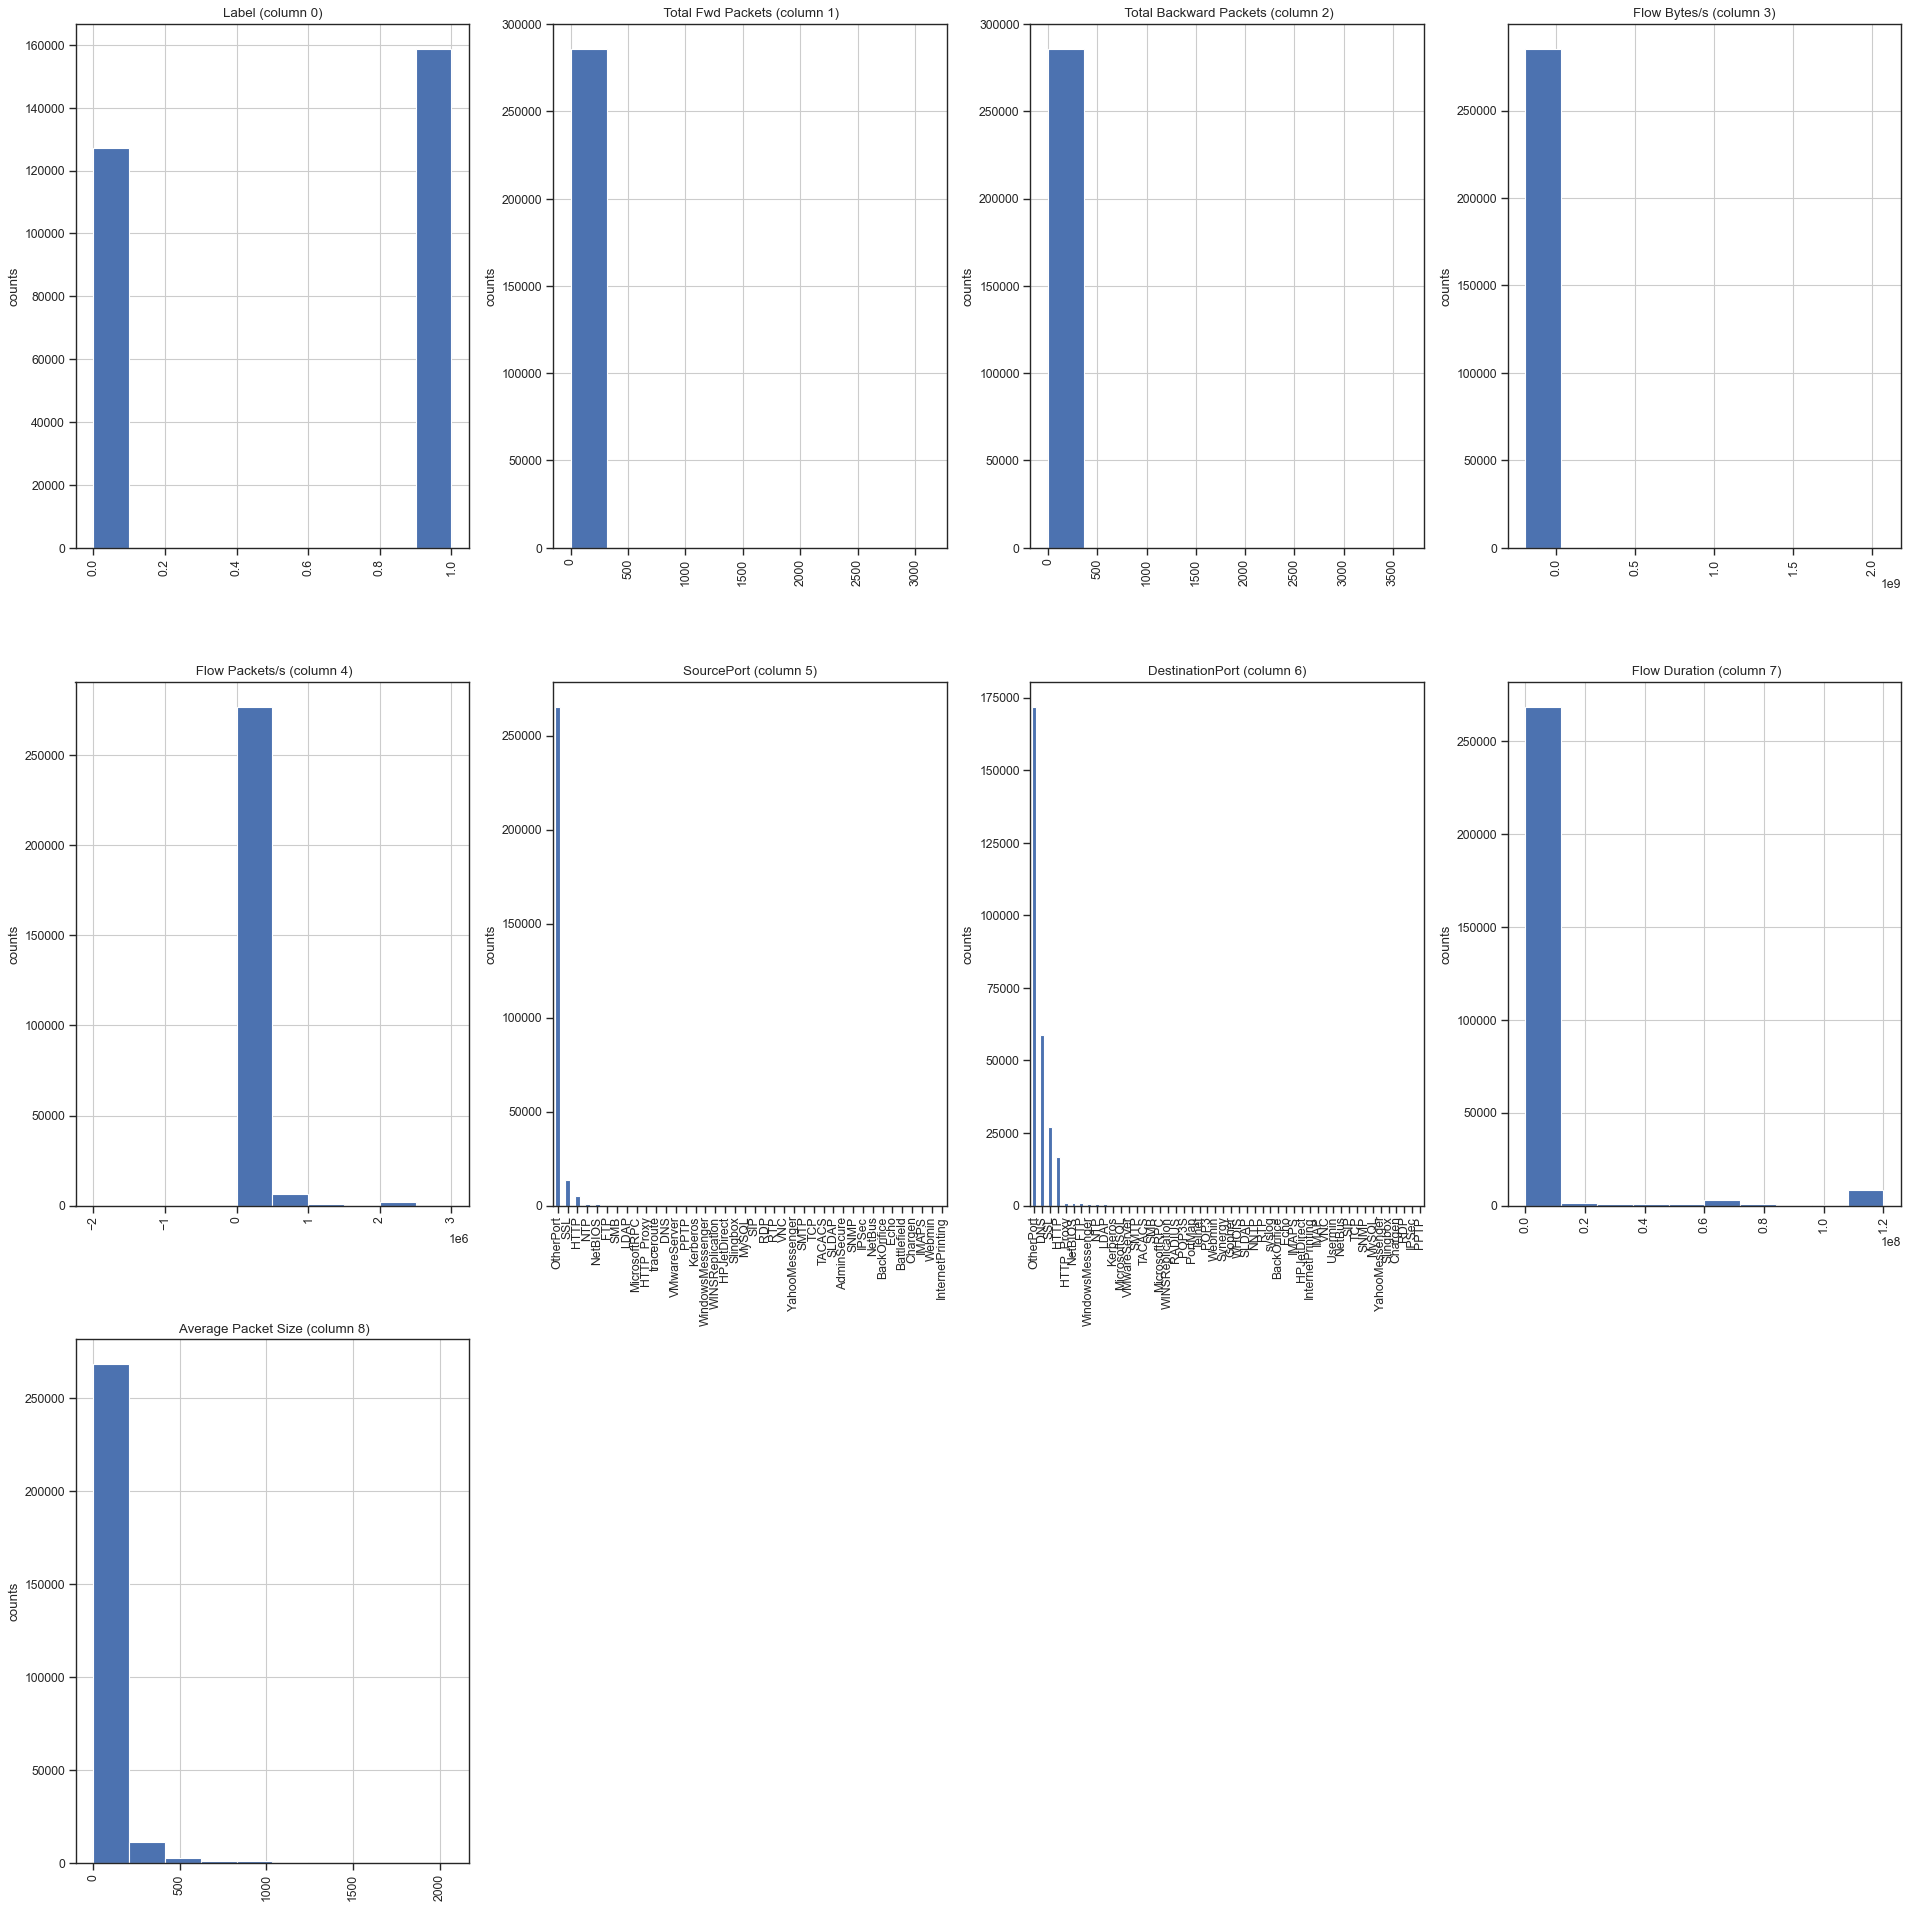

In [37]:
plots(graphdataset, 79, 4)

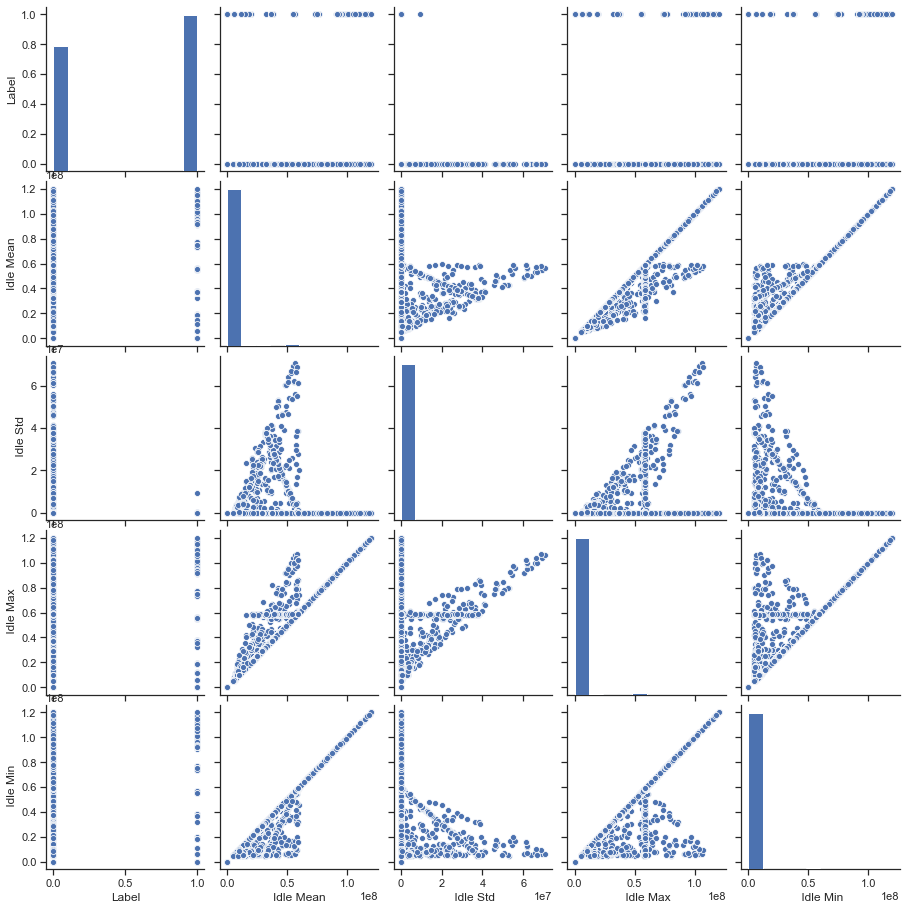

In [38]:
g1 = sns.pairplot(Dataset1, vars=["Label", "Idle Mean", " Idle Std", " Idle Max", " Idle Min"])

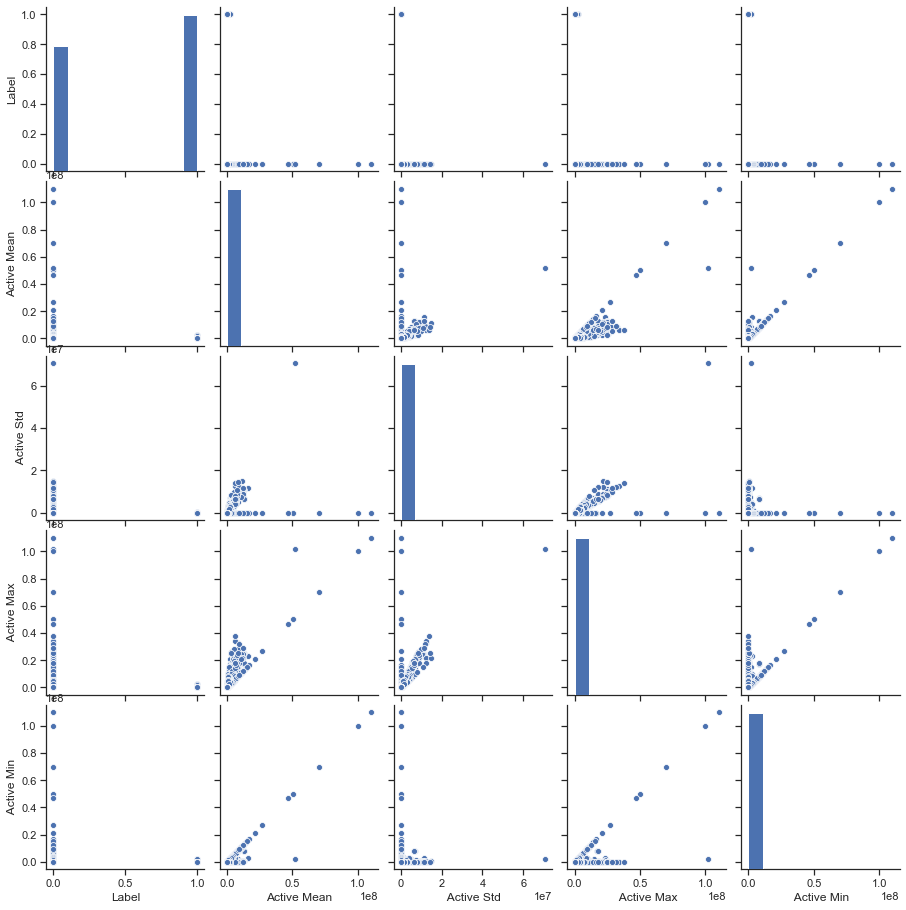

In [39]:
g2 = sns.pairplot(Dataset1, vars=["Label", "Active Mean", " Active Std", " Active Max", " Active Min"])

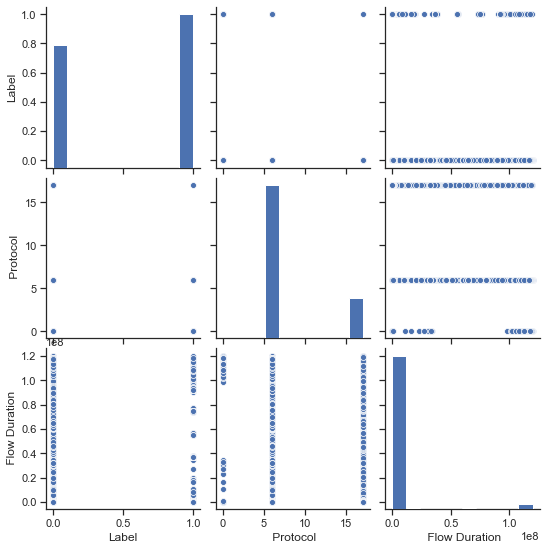

In [40]:
g3 = sns.pairplot(Dataset1, vars=["Label", " Protocol", " Flow Duration"])

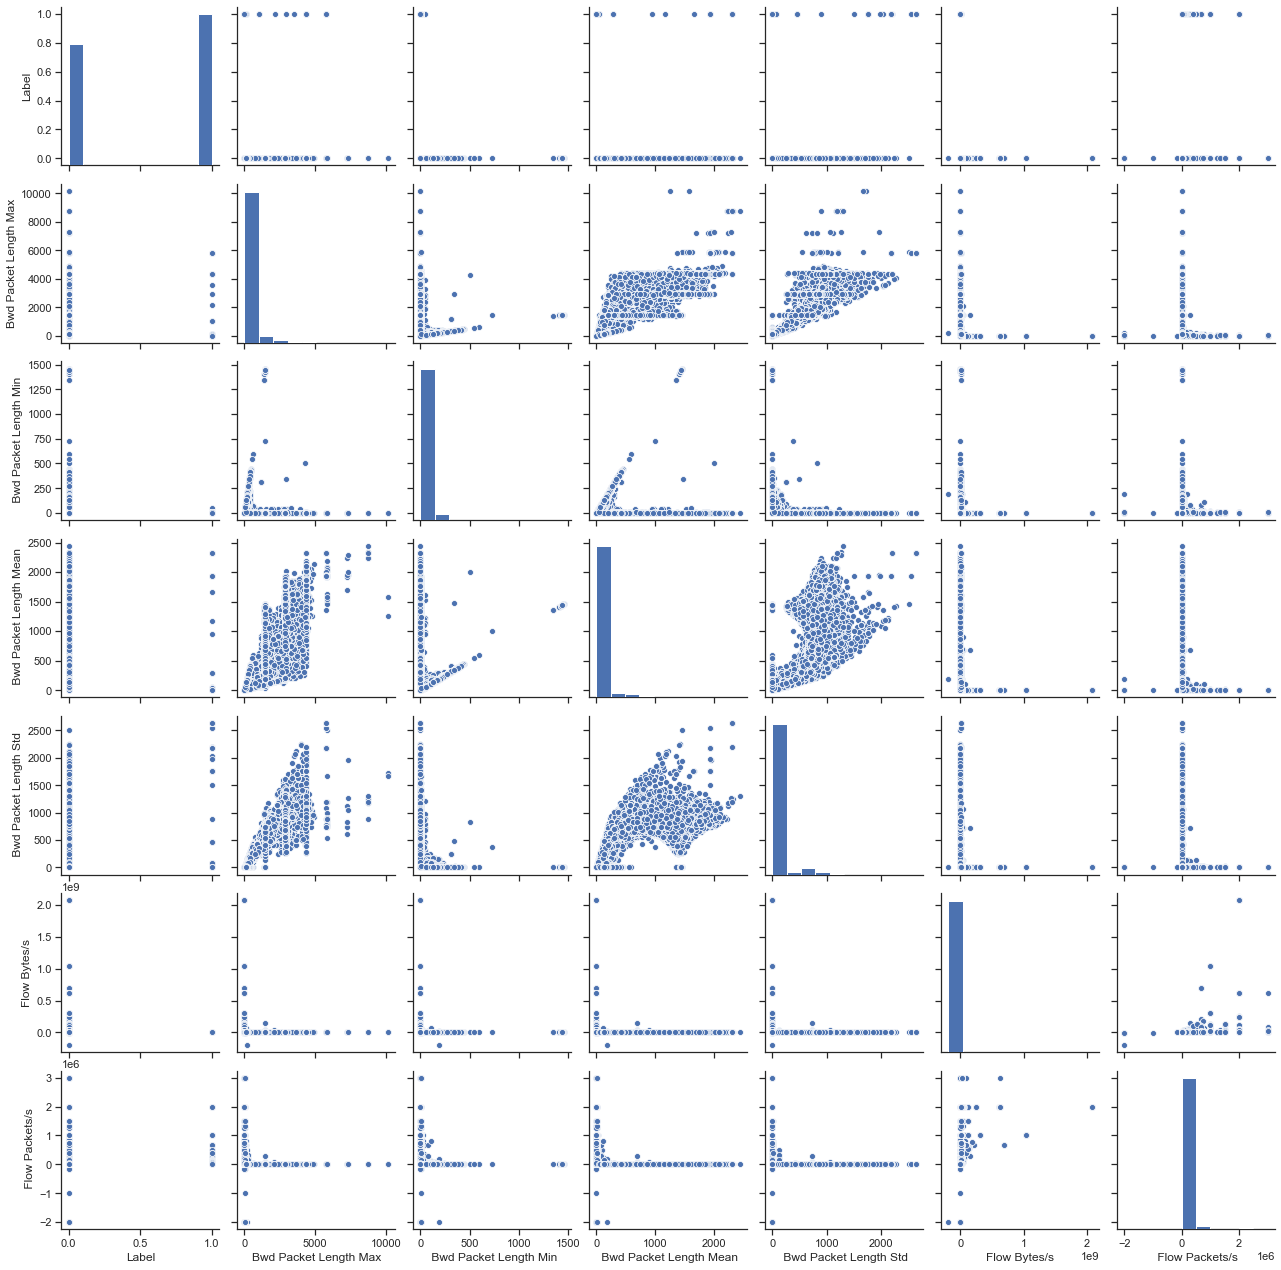

In [41]:
g5 = sns.pairplot(Dataset1, vars=["Label", "Bwd Packet Length Max", " Bwd Packet Length Min", " Bwd Packet Length Mean",
                                 " Bwd Packet Length Std", "Flow Bytes/s", " Flow Packets/s"])

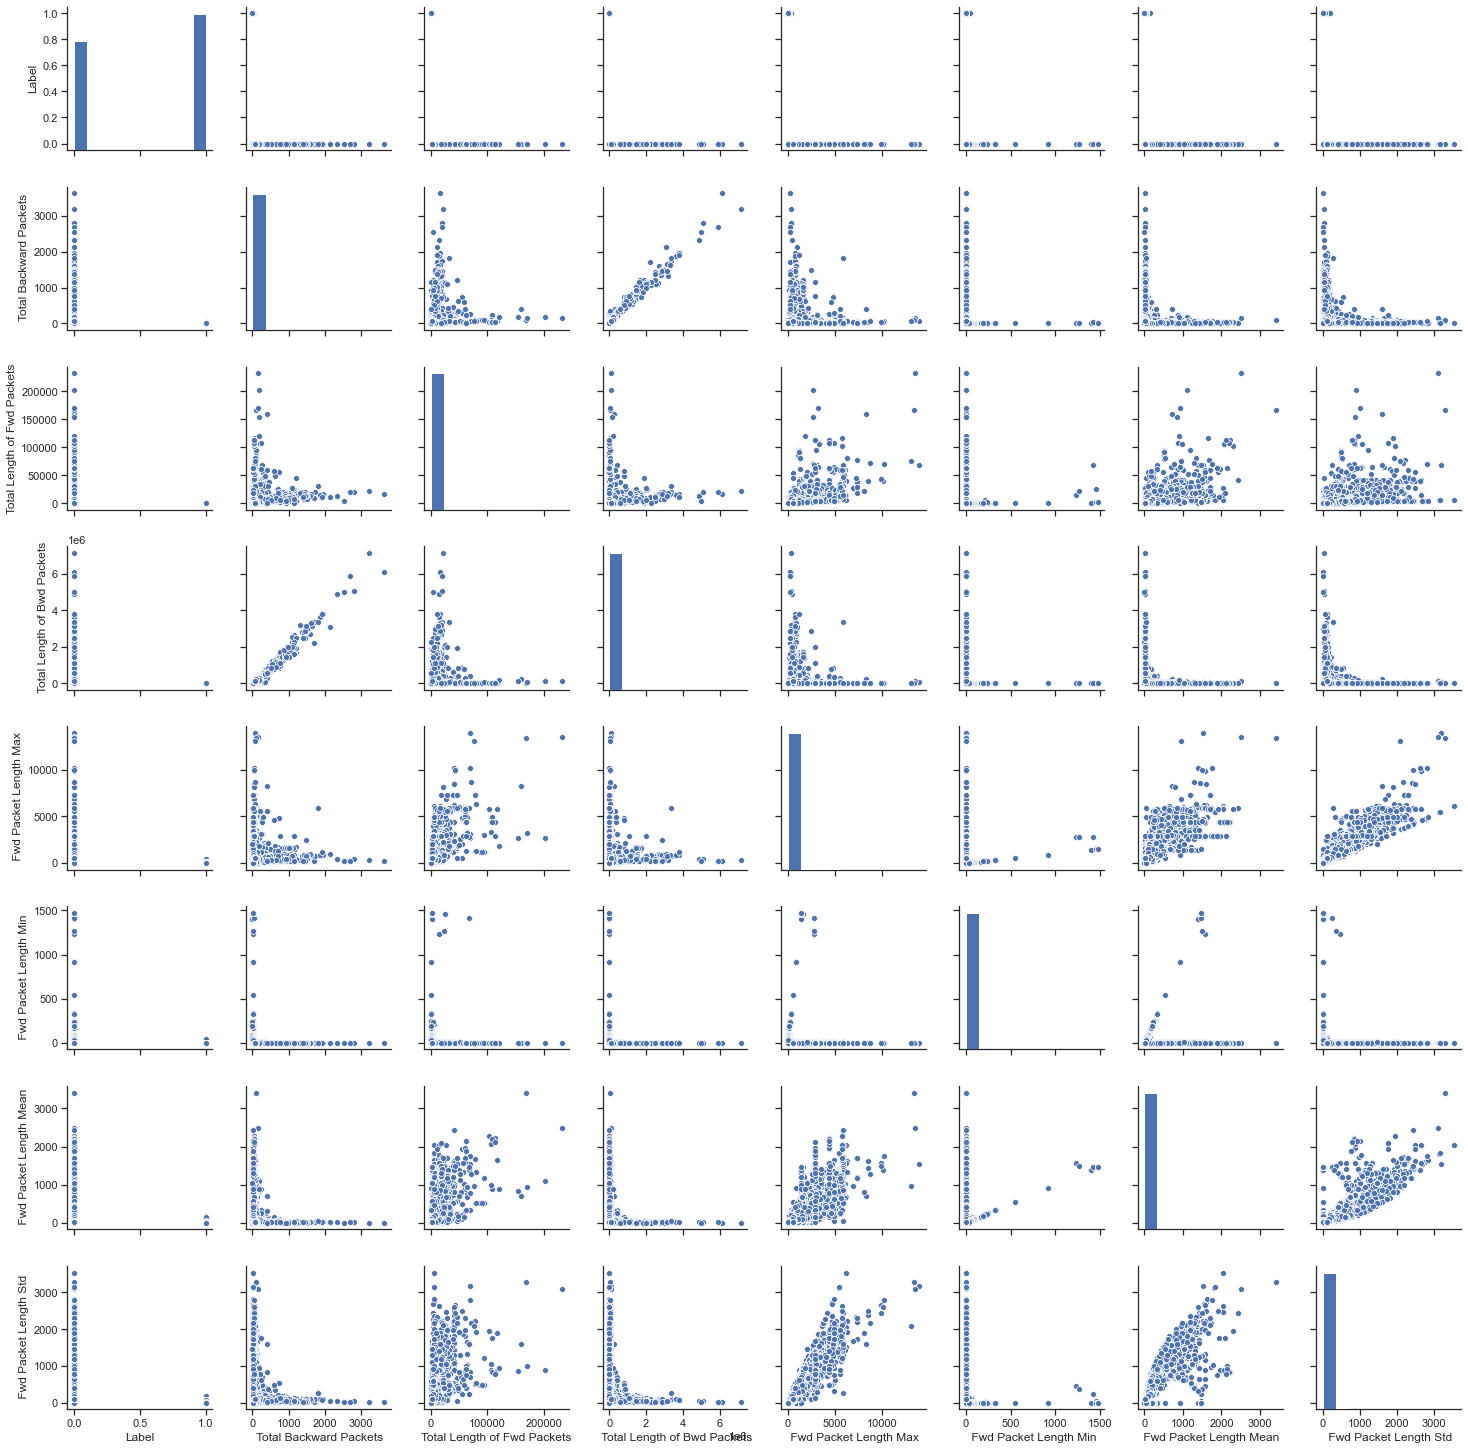

In [42]:
g6 = sns.pairplot(Dataset1, vars=["Label"," Total Backward Packets", "Total Length of Fwd Packets", " Total Length of Bwd Packets",
                                 " Fwd Packet Length Max", " Fwd Packet Length Min", " Fwd Packet Length Mean",
                                 " Fwd Packet Length Std"])

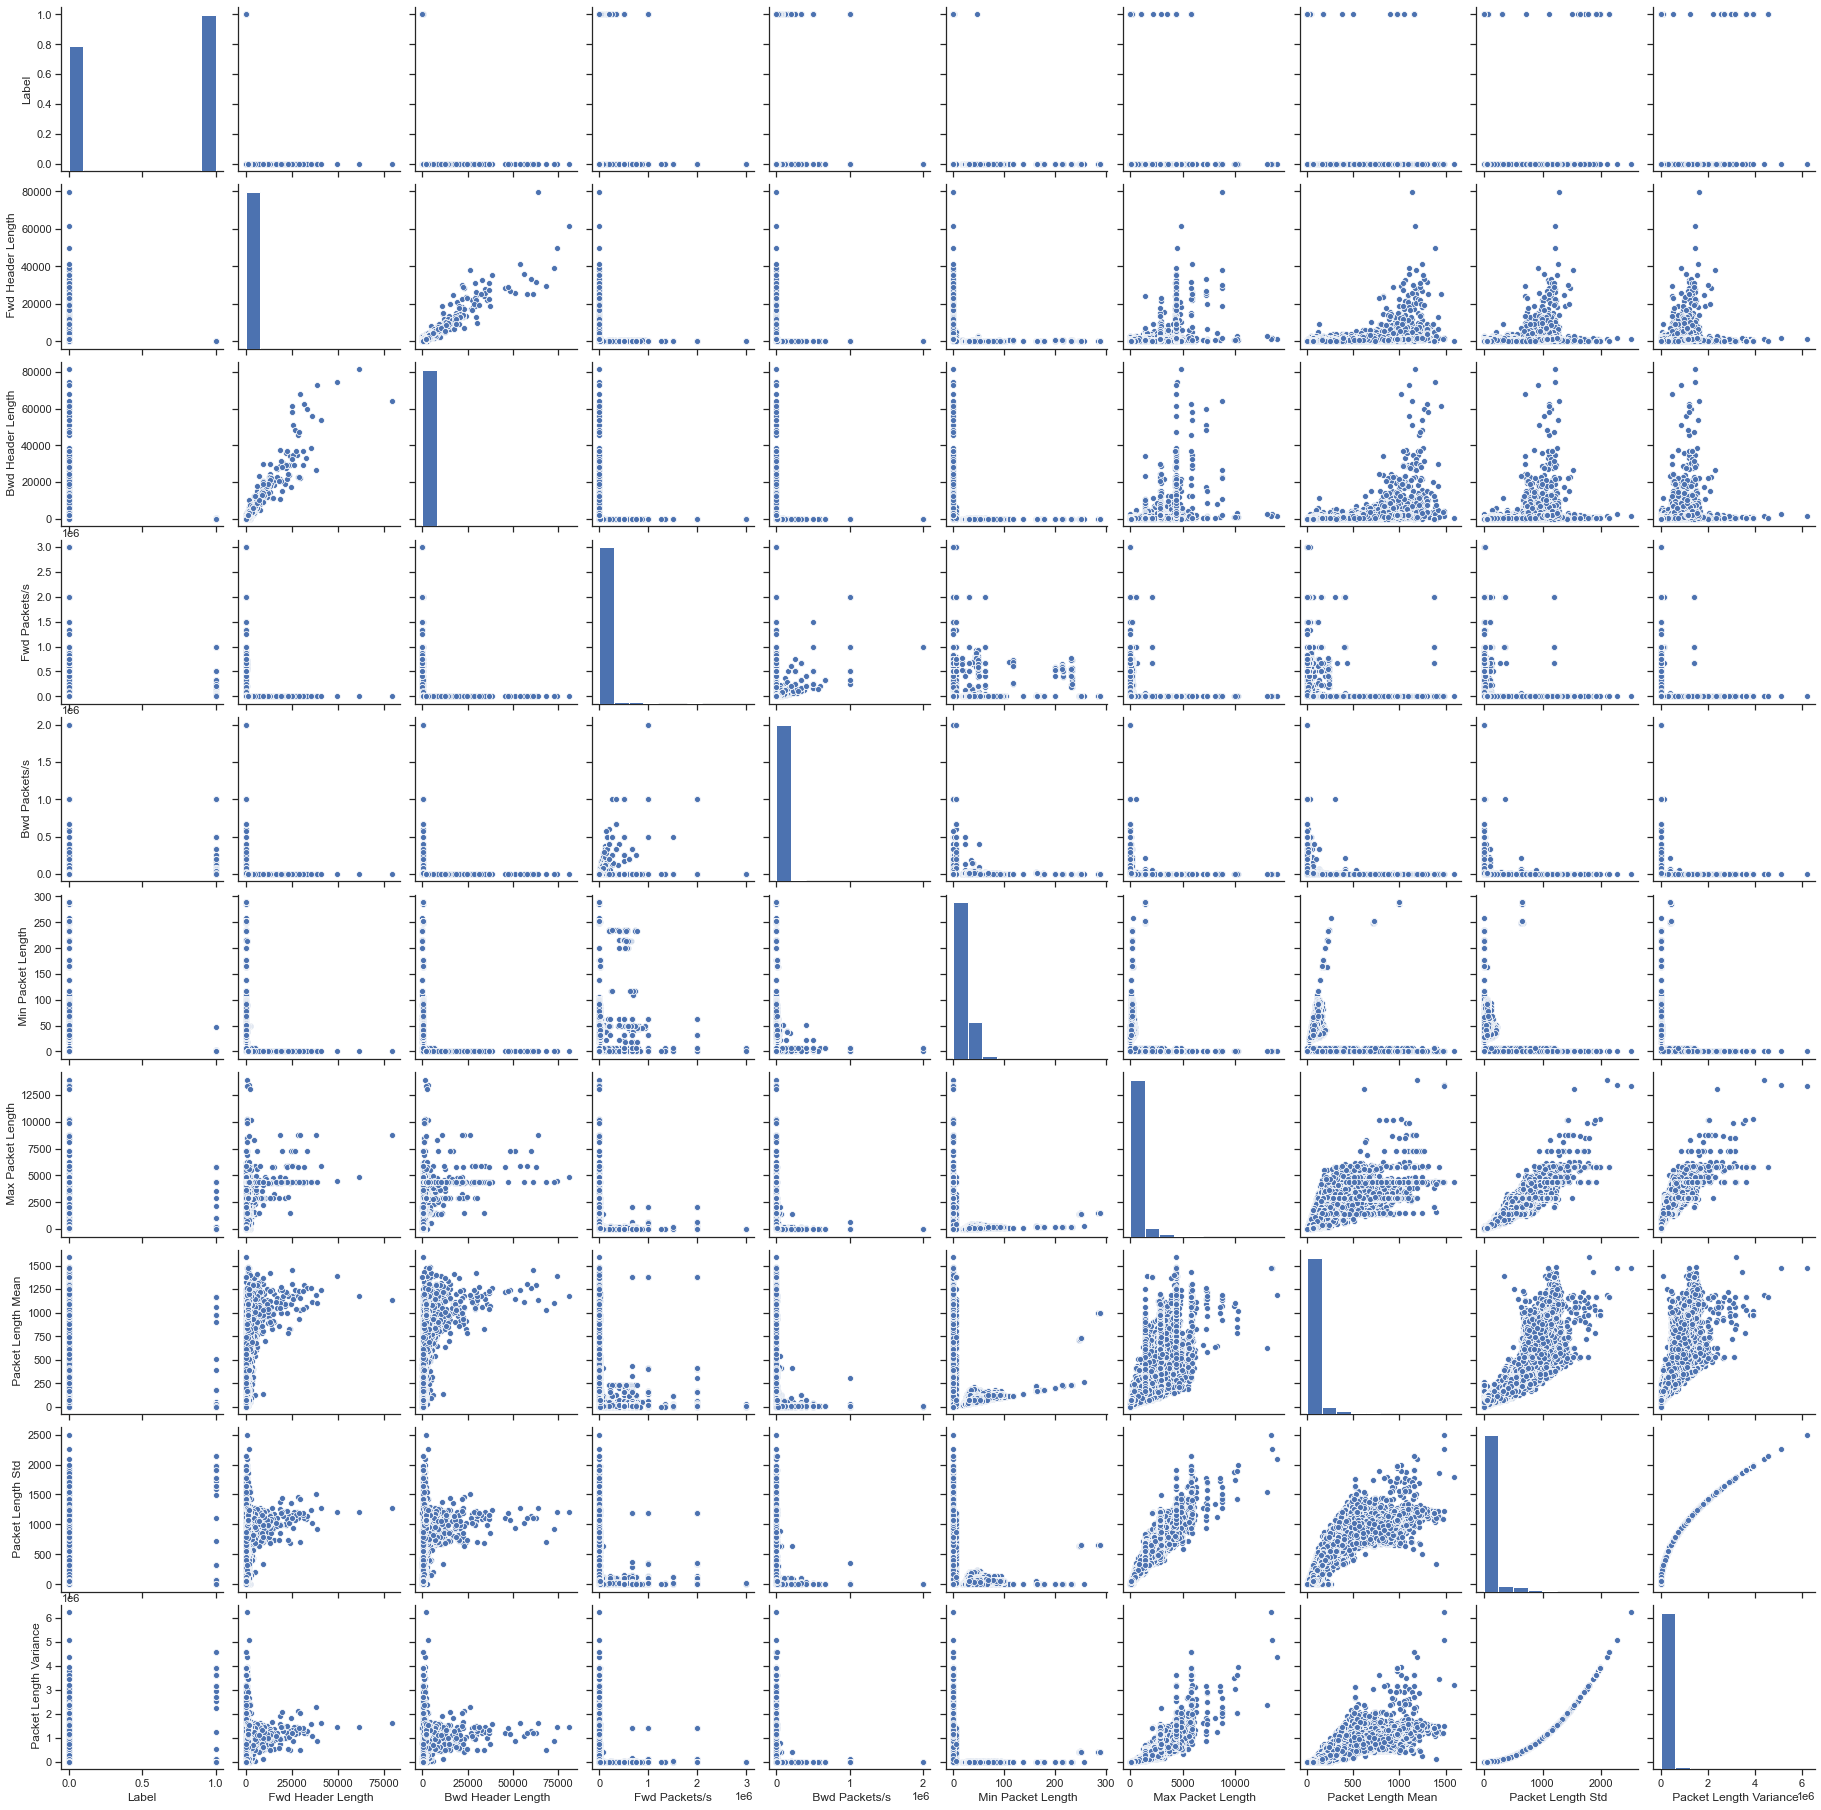

In [43]:
g7 = sns.pairplot(Dataset1, vars=["Label"," Fwd Header Length", " Bwd Header Length", "Fwd Packets/s", " Bwd Packets/s",
                                  " Min Packet Length", " Max Packet Length", " Packet Length Mean", " Packet Length Std",
                                 " Packet Length Variance"])

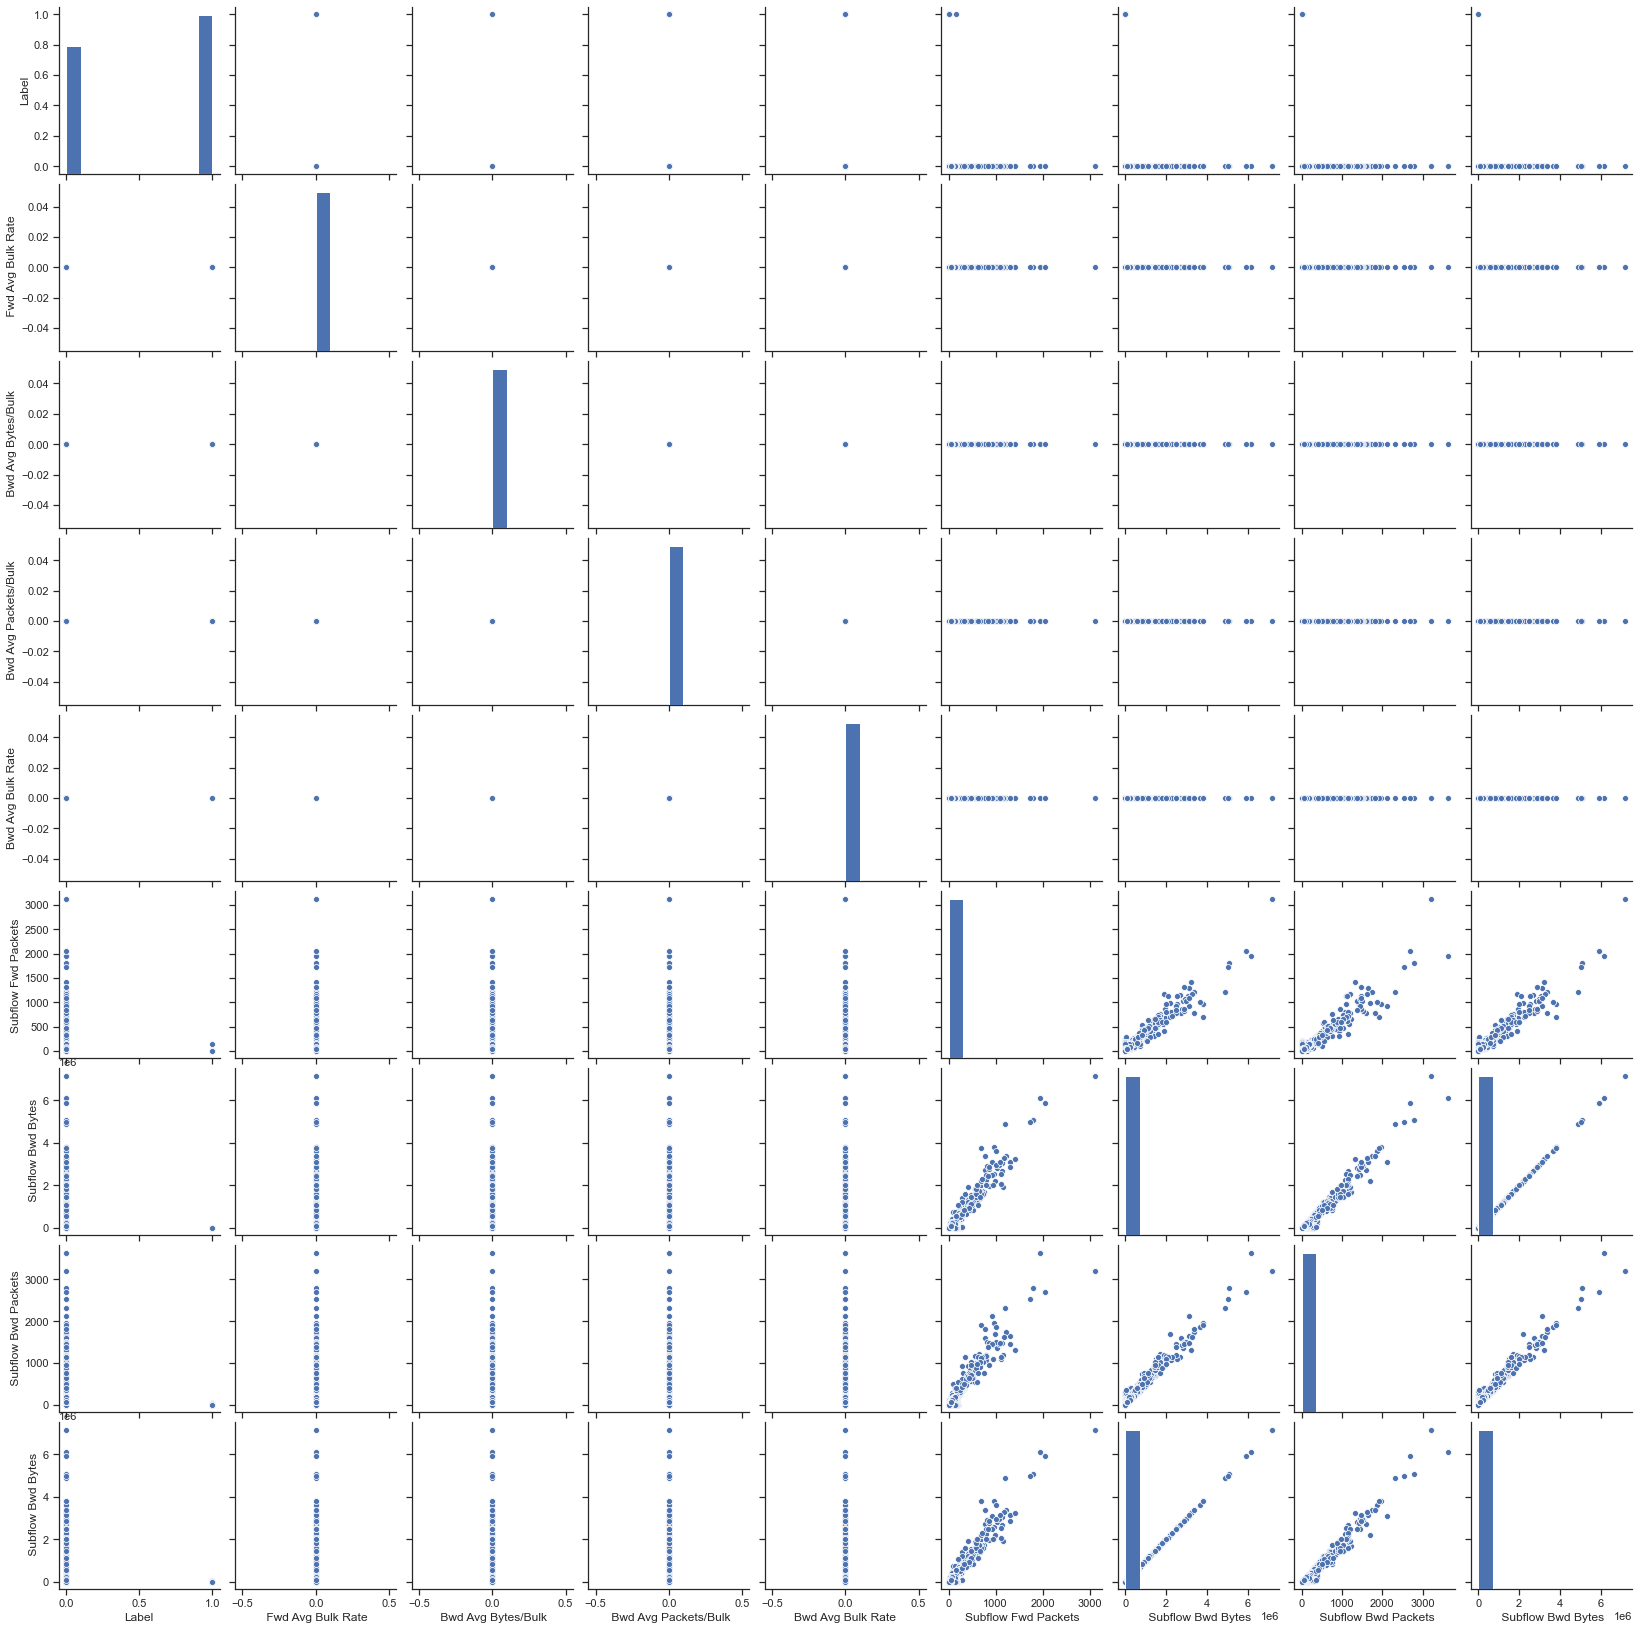

In [44]:
g8 = sns.pairplot(Dataset1, vars=["Label"," Fwd Avg Bulk Rate",
                                 " Bwd Avg Bytes/Bulk", " Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets",
                                 " Subflow Bwd Bytes", " Subflow Bwd Packets", " Subflow Bwd Bytes"])

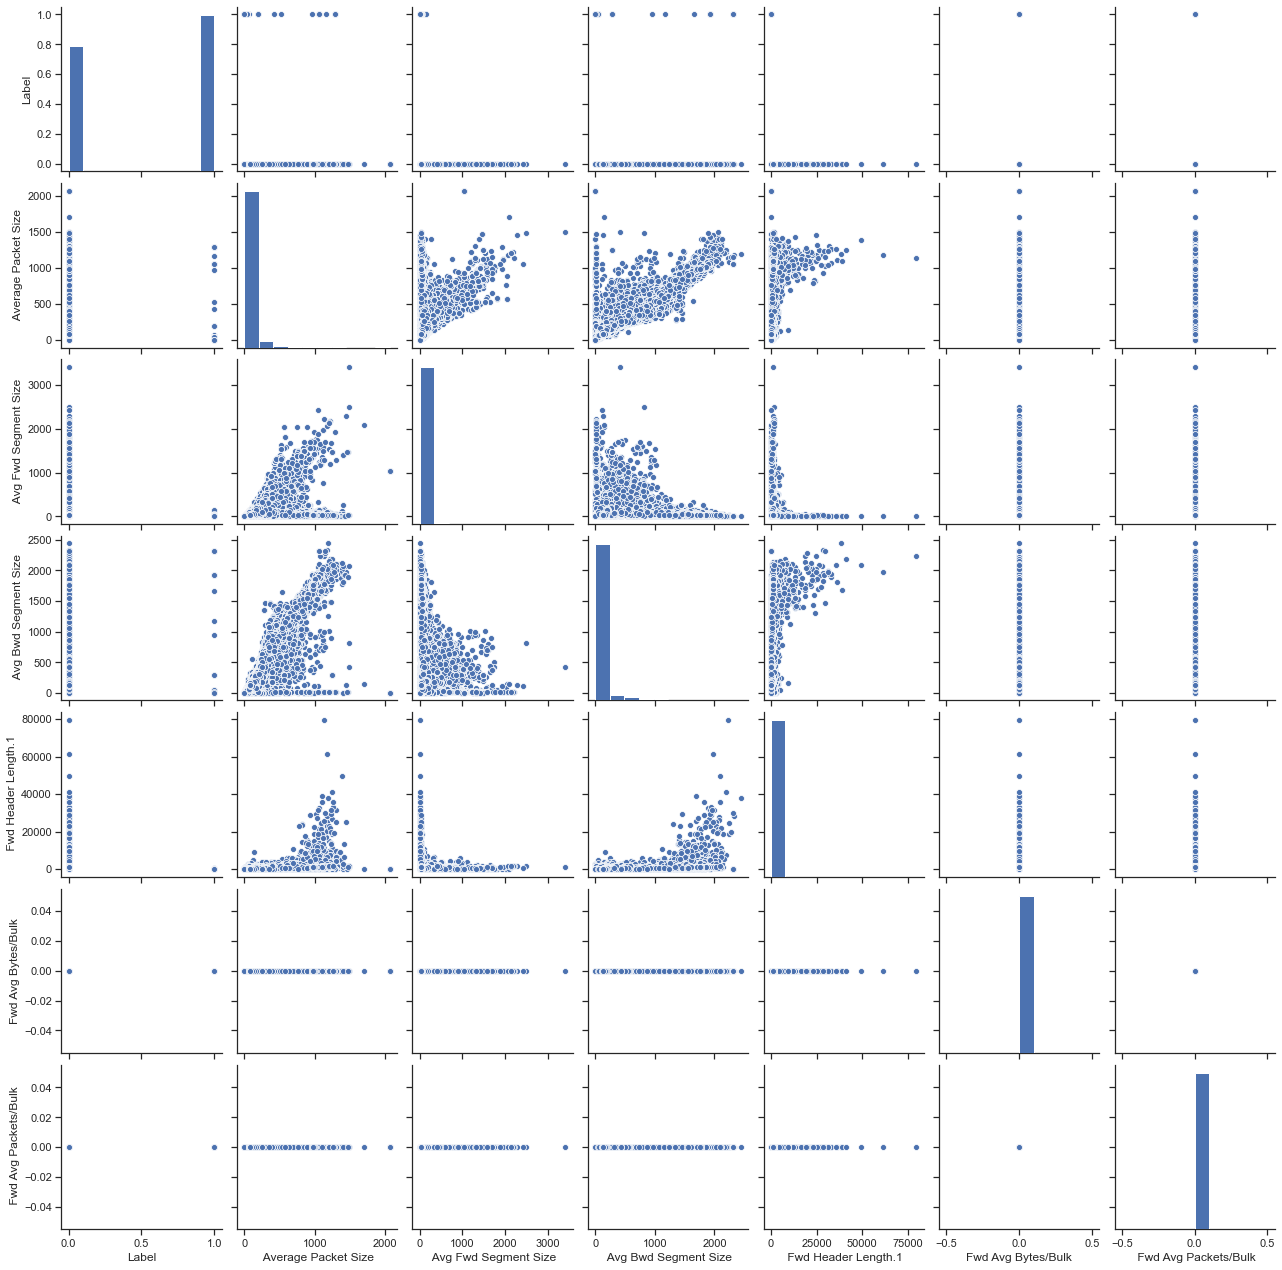

In [45]:
g9 = sns.pairplot(Dataset1, vars=["Label"," Average Packet Size", " Avg Fwd Segment Size", " Avg Bwd Segment Size",
                                 " Fwd Header Length.1", "Fwd Avg Bytes/Bulk", " Fwd Avg Packets/Bulk"])

In [46]:
Dataset1.corr()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Protocol,1.000000,-0.075420,-0.040599,-0.032034,-0.039354,-0.025361,-0.057691,0.712935,0.131303,-0.106775,...,-0.170324,-0.038132,-0.052505,-0.059802,-0.022862,0.029274,-0.005999,0.027857,0.031735,-0.575237
Flow Duration,-0.075420,1.000000,0.328987,0.263425,0.275713,0.165149,0.417747,-0.061144,0.192349,0.323069,...,-0.137216,0.195625,0.347859,0.379166,0.100927,0.666446,0.183944,0.669637,0.644502,-0.270029
Total Fwd Packets,-0.040599,0.328987,1.000000,0.962078,0.325551,0.947849,0.221654,-0.031267,0.097746,0.145923,...,-0.075494,0.220724,0.285030,0.322935,0.136645,0.199002,0.097146,0.205153,0.187464,-0.140634
Total Backward Packets,-0.032034,0.263425,0.962078,1.000000,0.286883,0.979191,0.185955,-0.028249,0.068458,0.112758,...,-0.050180,0.182340,0.212273,0.251638,0.129551,0.174332,0.082240,0.178680,0.165232,-0.099395
Total Length of Fwd Packets,-0.039354,0.275713,0.325551,0.286883,1.000000,0.203246,0.622009,-0.006198,0.603744,0.552922,...,-0.062451,0.303151,0.345173,0.399386,0.183892,0.143355,0.075142,0.148579,0.132960,-0.139184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,0.029274,0.666446,0.199002,0.174332,0.143355,0.120951,0.218302,0.019880,0.124730,0.165607,...,-0.108004,0.172594,0.150086,0.183861,0.133441,1.000000,0.169604,0.994536,0.994226,-0.196108
Idle Std,-0.005999,0.183944,0.097146,0.082240,0.075142,0.059631,0.072638,-0.003601,0.040046,0.051932,...,-0.037192,0.080501,0.127582,0.103380,0.031736,0.169604,1.000000,0.268725,0.067232,-0.056151
Idle Max,0.027857,0.669637,0.205153,0.178680,0.148579,0.124081,0.220624,0.019094,0.126140,0.167125,...,-0.109708,0.179289,0.162874,0.193556,0.134462,0.994536,0.268725,1.000000,0.978459,-0.197230
Idle Min,0.031735,0.644502,0.187464,0.165232,0.132960,0.114881,0.208044,0.021664,0.119824,0.158226,...,-0.104605,0.165055,0.134586,0.170834,0.131652,0.994226,0.067232,0.978459,1.000000,-0.190172


In [47]:
#removing features

drop2 = [' Idle Max', 'Idle Mean', ' Bwd Packet Length Min', ' Fwd Packet Length Std', ' Bwd Packet Length Std',
        ' Bwd Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' Fwd IAT Std', ' Bwd IAT Std',
        ' Avg Bwd Segment Size', 'Bwd Packet Length Max', ' Max Packet Length', ' Active Std']

Dataset1.drop(columns=drop2, inplace=True)

In [48]:
#check
Dataset1.shape

(286096, 67)

In [49]:
# Appling the onehot-encoding method to Destination and Source Port
Dataset1 = encode_onehot(Dataset1, 'SourcePort')
Dataset1 = encode_onehot(Dataset1, 'DestinationPort')

In [50]:
#making sure the features were dropped and Source Port and Destination Port were one hot encoded
Dataset1.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Flow Bytes/s,...,DestinationPort - Telnet,DestinationPort - Usermin,DestinationPort - VMwareServer,DestinationPort - VNC,DestinationPort - WHOIS,DestinationPort - WINSReplication,DestinationPort - Webmin,DestinationPort - WindowsMessenger,DestinationPort - YahooMessenger,DestinationPort - syslog
0,6,1266342,41,44,2664,6954,456,0,64.975610,7595.104640,...,0,0,0,0,0,0,0,0,0,0
1,6,1319353,41,44,2664,6954,456,0,64.975610,7289.936810,...,0,0,0,0,0,0,0,0,0,0
2,6,160,1,1,0,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,6,1303488,41,42,2728,6634,456,0,66.536585,7182.267884,...,0,0,0,0,0,0,0,0,0,0
4,6,77,1,2,0,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#check
Dataset1.shape

(286096, 155)

After viewing the dataset through various histograms and pairwise plots the following features below were removed.  They seemed redundant(many of the standard deviation features since we have the mean and maxes) or were correlated with other features and not Label.  

Dropped Features: Idle Max, Idle Mean, Bwd Packet Length Min, Fwd Packet Length Std, Bwd Packet Length Std, Bwd Packet Length Mean, Packet Length Std, Packet Length Variance, Fwd IAT Std, Bwd IAT Std, Avg Bwd Segment Size, Bwd Packet Length Max, Max Packet Length, Active Std

***

## Problem 7

*Attempt a few classifier models and report their 10-fold CV performance.*

In [52]:
#splitting data
X = Dataset1.loc[:, Dataset1.columns != 'Label'].values
y = Dataset1.loc[:, Dataset1.columns == 'Label'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import KFold

models = ["Decision_Tree", "Random_Forest", "KNearest", "BernouilliNB"]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    BernoulliNB()]

In [54]:
%%time

#10-fold cross validation 
crossvalidation = KFold(n_splits=10, shuffle=False, random_state=None)

#applying 10-fold cross validation to all models
accuracies = []
for model, clf in zip(models, classifiers):
    model_ = clf.fit(X_train, y_train)
    accuracy = cross_val_score(model_, X_train, y_train, scoring='accuracy', cv=crossvalidation, n_jobs=-1)
    accuracies.append(np.mean(accuracy))

#scores

df = pd.DataFrame()
df['model'] = models
df['accuracy'] = accuracies
df

Wall time: 18min 21s


,model,accuracy
0,Decision_Tree,0.999921
1,Random_Forest,0.999939
2,KNearest,0.998973
3,BernouilliNB,0.994342


On my computer, it took a long time for the accuracies to generate.  Based on the very high accuracy, it's possible that the model was overfitted and more features should have been dropped.  I am selecting the Decision Tree classifier as the model to be used for the other datasets since it has the highest accuracy.

***

## Problem 8

*Convert your code to be used for the remaining 7 datasets, i.e. Datasets 2-8.*

In [55]:
#remove nulls and columns

#datasets 2-8
Dataset2 = df1.copy()
Dataset3 = df3.copy()
Dataset4 = df4.copy()
Dataset5 = df5.copy()
Dataset6 = df6.copy()
Dataset7 = df7.copy()
Dataset8 = df8.copy()

In [56]:
#combined all the dropped columns

drop3 = ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp',' Idle Max', 'Idle Mean', ' Bwd Packet Length Min', ' Fwd Packet Length Std', ' Bwd Packet Length Std',
        ' Bwd Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' Fwd IAT Std', ' Bwd IAT Std',
        ' Avg Bwd Segment Size', 'Bwd Packet Length Max', ' Max Packet Length', ' Active Std']

In [57]:
#putting all datasets into a list
datasets = [Dataset2, Dataset3, Dataset4, Dataset5, Dataset6, Dataset7, Dataset8]

In [58]:
%%time
#dropping unncecessary columns, removing nulls, removing infinity values, renaming columns, fixing the label column,
##fixing the destination port column, and fixing the source port columns

for data in datasets:
    data.drop(columns=drop3, inplace=True)
    removeNullInfinity(data)
    data.rename(columns = {' Destination Port':'DestinationPort'}, inplace = True) 
    data.rename(columns = {' Source Port':'SourcePort'}, inplace = True) 
    data.rename(columns = {' Label':'Label'}, inplace = True)
    fixlabel(data)
    data['DestinationPort'] = data[['DestinationPort']].apply(fixDestinationPort, axis = 1)
    data['SourcePort'] = data[['SourcePort']].apply(fixSourcePort, axis = 1)
    #data = encode_onehot(data, 'SourcePort')
    #data = encode_onehot(data, 'DestinationPort')

Wall time: 2min 51s


In [59]:
#extracting the datasets from the list

Dataset2 = datasets[0]
Dataset3 = datasets[1]
Dataset4 = datasets[2]
Dataset5 = datasets[3]
Dataset6 = datasets[4]
Dataset7 = datasets[5]
Dataset8 = datasets[6]

In [60]:
#one-hot encoding all the datasets - it wasn't working in the loop

Dataset2 = encode_onehot(Dataset2, 'SourcePort')
Dataset2 = encode_onehot(Dataset2, 'DestinationPort')
Dataset3 = encode_onehot(Dataset3, 'SourcePort')
Dataset3 = encode_onehot(Dataset3, 'DestinationPort')
Dataset4 = encode_onehot(Dataset4, 'SourcePort')
Dataset4 = encode_onehot(Dataset4, 'DestinationPort')
Dataset5 = encode_onehot(Dataset5, 'SourcePort')
Dataset5 = encode_onehot(Dataset5, 'DestinationPort')
Dataset6 = encode_onehot(Dataset6, 'SourcePort')
Dataset6 = encode_onehot(Dataset6, 'DestinationPort')
Dataset7 = encode_onehot(Dataset7, 'SourcePort')
Dataset7 = encode_onehot(Dataset7, 'DestinationPort')
Dataset8 = encode_onehot(Dataset8, 'SourcePort')
Dataset8 = encode_onehot(Dataset8, 'DestinationPort')

In [61]:
#checking to make sure the dataset was preprocessed correctly

Dataset2.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Flow Bytes/s,...,DestinationPort - NTP,DestinationPort - NeTIQ,DestinationPort - NetBIOS,DestinationPort - NetIQ,DestinationPort - OtherPort,DestinationPort - Rbot_Spybot,DestinationPort - SMB,DestinationPort - SSL,DestinationPort - Usermin,DestinationPort - WINSReplication
0,6,3,2,0,12,0,6,6,6.0,4.000000e+06,...,0,0,0,0,1,0,0,0,0,0
1,6,109,1,1,6,6,6,6,6.0,1.100917e+05,...,0,0,0,0,1,0,0,0,0,0
2,6,52,1,1,6,6,6,6,6.0,2.307692e+05,...,0,0,0,0,1,0,0,0,0,0
3,6,34,1,1,6,6,6,6,6.0,3.529412e+05,...,0,0,0,0,1,0,0,0,0,0
4,6,3,2,0,12,0,6,6,6.0,4.000000e+06,...,0,0,0,0,1,0,0,0,0,0


In [62]:
#checking to make sure the dataset was preprocessed correctly

Dataset3.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Flow Bytes/s,...,DestinationPort - RDP,DestinationPort - SMB,DestinationPort - SSL,DestinationPort - TCP,DestinationPort - WINS,DestinationPort - WINSReplication,DestinationPort - WindowsMessenger,DestinationPort - WorldofWarcraft,DestinationPort - YahooMessenger,DestinationPort - traceroute
0,6,112740690,32,16,6448,1152.0,403,0,201.5,67.411331,...,0,0,0,0,0,0,0,0,0,0
1,6,112740560,32,16,6448,5056.0,403,0,201.5,102.039585,...,0,0,0,0,0,0,0,0,0,0
2,0,113757377,545,0,0,0.0,0,0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,17,100126,22,0,616,0.0,28,28,28.0,6152.248167,...,0,0,0,0,0,0,0,0,0,0
4,0,54760,4,0,0,0.0,0,0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


***

## Problem 9

*Pick a classifier and report it's evaluation for the remaining 7 datasets. Note that one dataset has a single class, which might need an unsupervised learning.*

In [63]:
# modified Classifier function from module 3 notebook

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score


KN = KNeighborsClassifier()
tree =  DecisionTreeClassifier()
crossvalidation = KFold(n_splits=10, shuffle=False, random_state=None)

def eval_classifier(_clf, _X, _y):
    acc = []
    f1 = []
    kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        acc += [accuracy_score(_y[test_index], y_pred)]
        f1 += [f1_score(_y[test_index], y_pred, average="macro")]
    #return np.array(acc)
    print(f'Decision Tree CV accuracy={np.mean(np.array(acc))} {chr(177)}{np.std(np.array(acc)):.3f}'
          f'and F1-Score: {np.mean(np.array(f1))}')

In [64]:
%%time
#Dataset2

X2 = Dataset2.loc[:, Dataset2.columns != 'Label'].values
y2 = Dataset2.loc[:, Dataset2.columns == 'Label'].values.ravel()
#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=None)

print(f'Dataset 2\n')
acc1 = eval_classifier(tree, X2, y2)

#print(f'Dataset 2\n')
#print(f'Random Forest CV accuracy={np.mean(acc1)} {chr(177)}{np.std(acc1):.3f}')

Dataset 2

Decision Tree CV accuracy=0.9992955580112713 ±0.001and F1-Score: 0.9992822082297504
Wall time: 43.8 s


In [65]:
%%time
#Dataset3

X3 = Dataset3.loc[:, Dataset3.columns != 'Label'].values
y3 = Dataset3.loc[:, Dataset3.columns == 'Label'].values.ravel()
#X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=None)

print(f'Dataset 3\n')
acc2 = eval_classifier(tree, X3, y3)

#print(f'Dataset 3\n')
#print(f'Kmeans CV accuracy={np.mean(acc2)} {chr(177)}{np.std(acc2):.3f}')

Dataset 3

Decision Tree CV accuracy=0.9999790477188204 ±0.000and F1-Score: 0.9994851392504878
Wall time: 18 s


In [66]:
%%time
#Dataset4

X4 = Dataset4.loc[:, Dataset4.columns != 'Label'].values
y4 = Dataset4.loc[:, Dataset4.columns == 'Label'].values.ravel()
#X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20, random_state=None)

print(f'Dataset 4\n')
acc3 = eval_classifier(tree, X4, y4)

#print(f'Dataset 4\n')
#print(f'Kmeans CV accuracy={np.mean(acc3)} {chr(177)}{np.std(acc3):.3f}')

Dataset 4

Decision Tree CV accuracy=1.0 ±0.000and F1-Score: 1.0
Wall time: 10.2 s


In [67]:
%%time
#Dataset5

X5 = Dataset5.loc[:, Dataset5.columns != 'Label'].values
y5 = Dataset5.loc[:, Dataset5.columns == 'Label'].values.ravel()
#X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.20, random_state=None)

print(f'Dataset 5\n')
acc4 = eval_classifier(tree, X5, y5)

#print(f'Dataset 5\n')
#print(f'Kmeans CV accuracy={np.mean(acc4)} {chr(177)}{np.std(acc4):.3f}')

Dataset 5

Decision Tree CV accuracy=0.9998404982244196 ±0.000and F1-Score: 0.7486505924786282
Wall time: 2min 14s


In [68]:
%%time
#Dataset6

X6 = Dataset6.loc[:, Dataset6.columns != 'Label'].values
y6 = Dataset6.loc[:, Dataset6.columns == 'Label'].values.ravel()
#X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.20, random_state=None)

print(f'Dataset 6\n')
acc5 = eval_classifier(tree, X6, y6)

#print(f'Dataset 6\n')
#print(f'Kmeans CV accuracy={np.mean(acc5)} {chr(177)}{np.std(acc5):.3f}')

Dataset 6

Decision Tree CV accuracy=0.9996886592840557 ±0.000and F1-Score: 0.9937943547975483
Wall time: 22.8 s


In [69]:
%%time
#Dataset7

X7 = Dataset7.loc[:, Dataset7.columns != 'Label'].values
y7 = Dataset7.loc[:, Dataset7.columns == 'Label'].values.ravel()
#X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.20, random_state=None)

print(f'Dataset 7\n')
acc6 = eval_classifier(tree, X7, y7)

#print(f'Dataset 7\n')
#print(f'Kmeans CV accuracy={np.mean(acc6)} {chr(177)}{np.std(acc6):.3f}')

Dataset 7

Decision Tree CV accuracy=0.9997262379345976 ±0.000and F1-Score: 0.9977013032999327
Wall time: 1min 52s


In [70]:
%%time
#Dataset8

X8 = Dataset8.loc[:, Dataset8.columns != 'Label'].values
y8 = Dataset8.loc[:, Dataset8.columns == 'Label'].values.ravel()
#X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.20, random_state=None)

print(f'Dataset 8\n')
acc7 = eval_classifier(tree, X8, y8)

#print(f'Dataset 8\n')
#print(f'Kmeans CV accuracy={np.mean(acc7)} {chr(177)}{np.std(acc7):.3f}')

Dataset 8

Decision Tree CV accuracy=0.9817458556273998 ±0.036and F1-Score: 0.9790216784063741
Wall time: 3min 23s


The Decision Tree model also had a really good performance for datasets 2-8.  All had cross-validation accuracies and F-1 scores of over 97%, with dataset 8 being the lowest.  As dataset1, it's possible that the model was overfitted and that more features should have been removed from the dataset.

***

## Problem 10

*Briefly write up your thoughts about developing a machine learning model where you are not a subject matter expert, such as, developing a cybersecurity intrusion detection pipeline as in this assignment.*

Not being a subject matter expert, I think it’s primarily difficult to understand how the features are related to each other as well as the target.  In other assignments, even if we are not a subject matter expert, many of the datasets included information on which people commonly may have some general knowledge, such as flowers.  However, for this assignment, also being a large dataset, I thought it was difficult understanding which features were the most important to keep or remove and how each feature impacted the other.  I think possibly using a feature ranking method would have been more useful compared to eyeballing many pair plots.  I also had the same difficulty regarding which ports should be used when one-hot-encoding the Source and Destination ports.  I have a very basic knowledge of Cybersecurity so I did read articles online for more information, however, I did not feel confident about all my decisions. 

***
## References

https://www.unb.ca/cic/datasets/ids-2017.html

https://www.techwalla.com/articles/what-is-email-protocol

https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c

https://stackoverflow.com/questions/45745085/python-pandas-how-to-remove-nan-and-inf-values

https://stackoverflow.com/questions/58519214/finding-and-returning-the-rows-of-a-pandas-dataframe-where-there-is-at-least-

https://stackoverflow.com/questions/42790542/find-row-positions-and-column-names-of-cells-contanining-inf-in-pandas-

https://stackoverflow.com/questions/34537048/how-to-count-nan-values-in-a-pandas-dataframedataframe

https://www.lifewire.com/popular-tcp-and-udp-port-numbers-817985

https://securitytrails.com/blog/top-scanned-ports

https://www.w3schools.in/cyber-security/ports-and-its-security/

https://thedarksource.com/common-ports-cheat-sheet/

https://www.kaggle.com/kerneler/starter-cicids2017-3f12f887-1